In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Load Dataset
data=pd.read_csv("employee_promotion.csv")

In [3]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [4]:
#shape of the dataset
data.shape

(54808, 13)

In [5]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [7]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [8]:
#Null values count
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

#### Education, previous_year_rating, and avg_training_score contain null values

In [10]:
data.isnull().sum().sum()/len(data)

0.16590643701649394

#### 16% null values is present in the data set

In [11]:
data['previous_year_rating'].fillna(value=0,inplace=True)
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['avg_training_score'] = data['avg_training_score'].fillna(data['avg_training_score'].mode()[0])

In [12]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [13]:
#Duplicate values count
data.duplicated().sum()

0

In [14]:
data=data.drop_duplicates()

In [15]:
data[data.columns].nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        6
length_of_service          35
awards_won                  2
avg_training_score         59
is_promoted                 2
dtype: int64

In [16]:
data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [17]:
data['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [18]:
data['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [19]:
data['avg_training_score'].value_counts()

50.0    5276
49.0    2681
48.0    2437
51.0    2347
60.0    2155
59.0    2064
58.0    1898
52.0    1856
47.0    1746
62.0    1450
82.0    1447
57.0    1437
81.0    1357
53.0    1324
80.0    1206
83.0    1198
84.0    1168
79.0    1160
46.0    1136
85.0    1072
56.0    1070
70.0    1055
63.0    1021
69.0    1018
54.0     997
68.0     935
78.0     933
86.0     912
71.0     898
55.0     872
67.0     728
72.0     725
64.0     708
77.0     697
87.0     655
65.0     599
66.0     580
73.0     523
76.0     516
88.0     444
74.0     433
75.0     403
44.0     335
89.0     301
90.0     185
43.0     176
91.0     117
92.0      99
93.0      84
94.0      65
42.0      62
97.0      49
96.0      48
95.0      45
98.0      37
99.0      35
41.0      26
40.0       5
39.0       2
Name: avg_training_score, dtype: int64

In [20]:
data['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [21]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

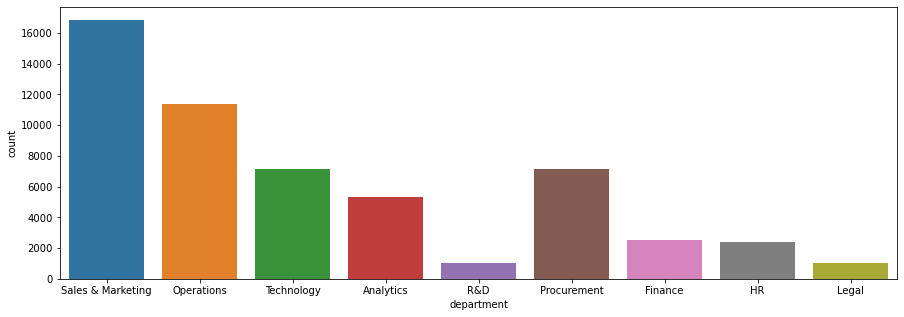

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(data= data, x = "department")
plt.show()

#### Most of the employees are from Sales & Marketing and the least number of employees from Legal and R&D department

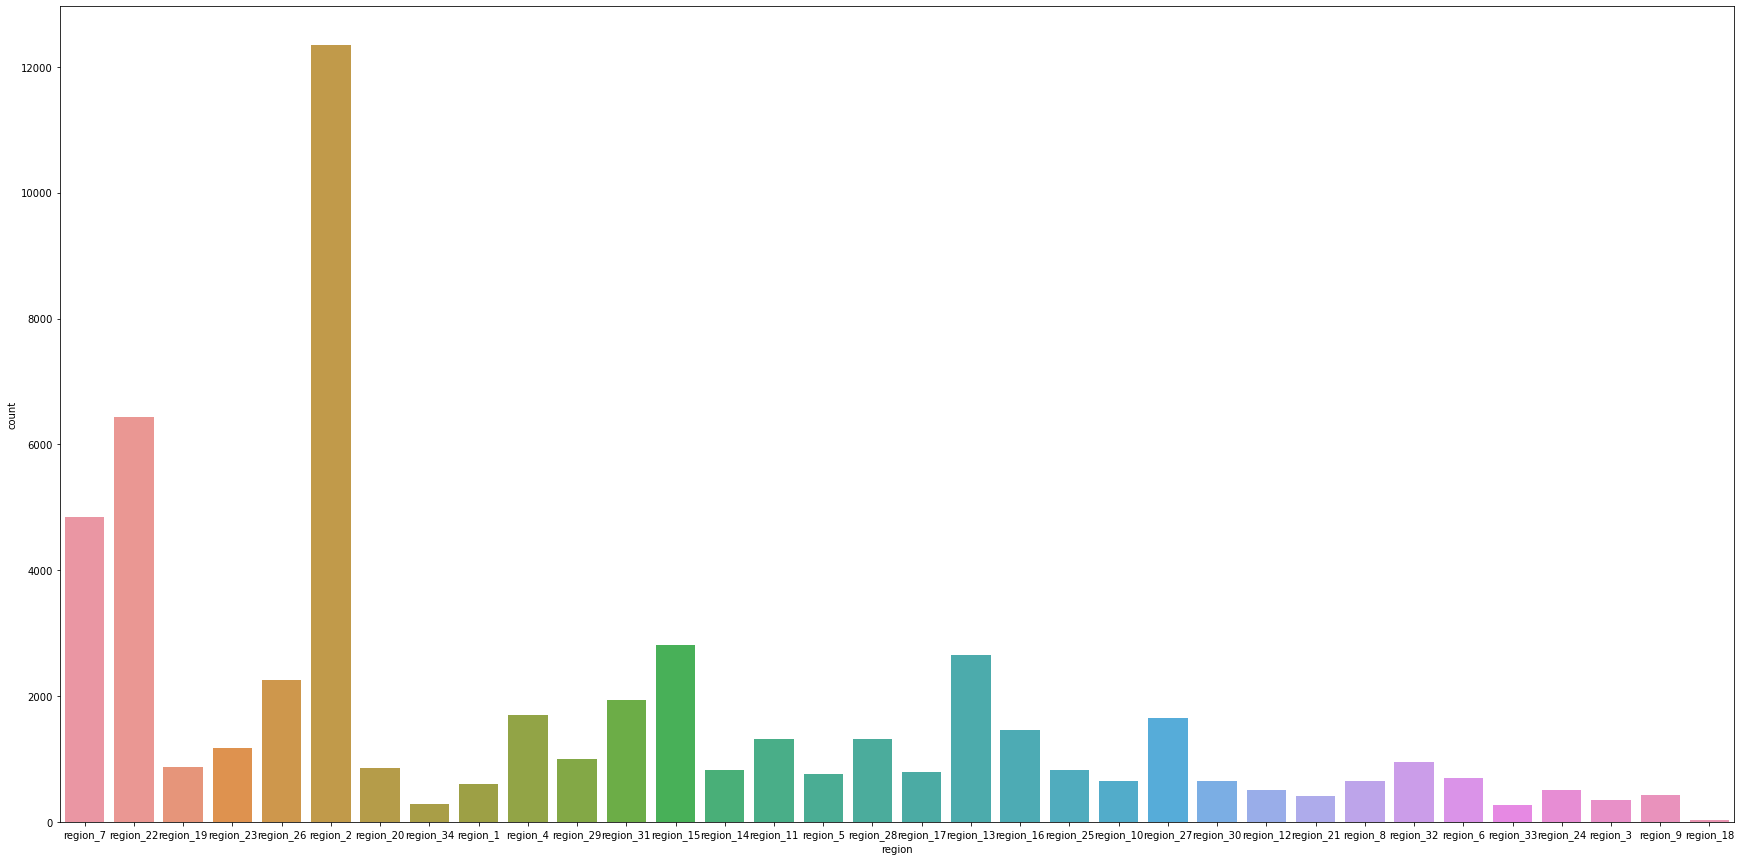

In [24]:
plt.figure(figsize=(30,15))
sns.countplot(data= data, x = "region")
plt.show()

#### Most of the employees are from Region 2 and with least from Region 18

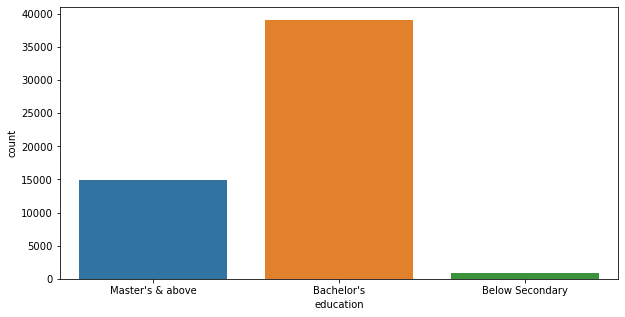

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x = "education")
plt.show()

<AxesSubplot:ylabel='education'>

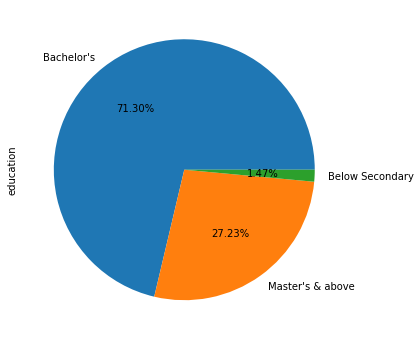

In [26]:
plt.figure(figsize= (6,6))
data['education'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

####  68% of Employees have Bachelor's degree with less than 1% below secondary level.

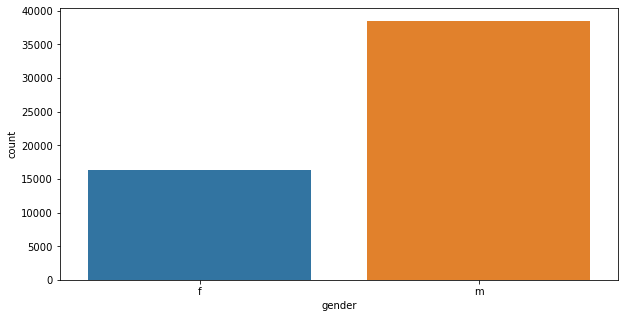

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x = "gender")
plt.show()

<AxesSubplot:ylabel='gender'>

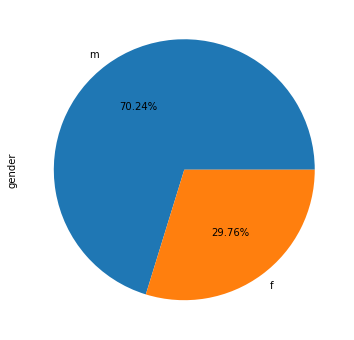

In [28]:
plt.figure(figsize= (6,6))
data['gender'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

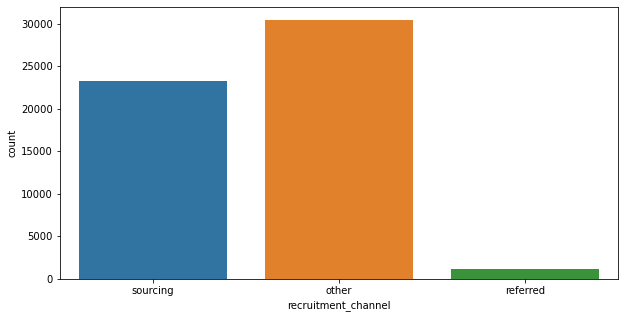

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x = "recruitment_channel")
plt.show()

<AxesSubplot:ylabel='recruitment_channel'>

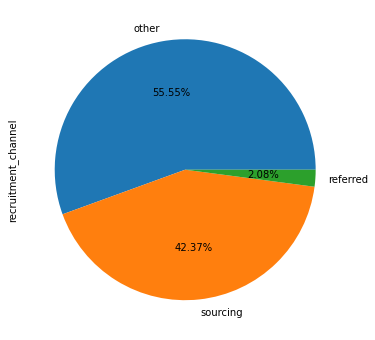

In [30]:
plt.figure(figsize= (6,6))
data['recruitment_channel'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

#### Referred employees are very low, With only 2% Employees being hired by referrals. 55% of employees are from other sources

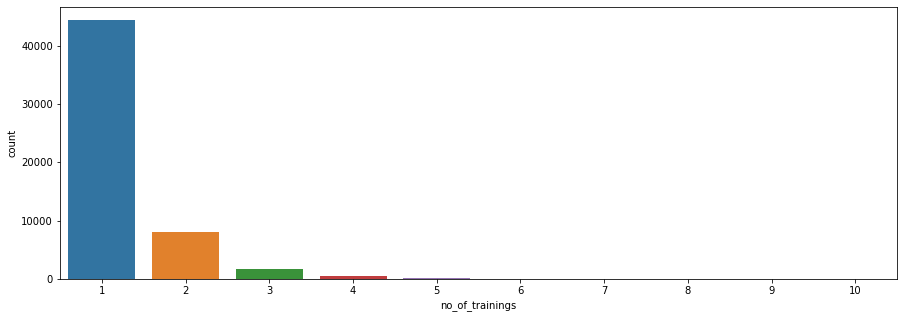

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(data= data, x = "no_of_trainings")
plt.show()

<AxesSubplot:ylabel='no_of_trainings'>

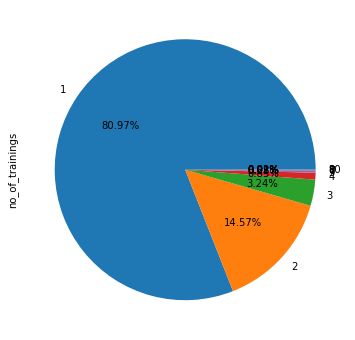

In [32]:
plt.figure(figsize= (6,6))
data['no_of_trainings'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

#### 80% of the employees have attended atleast 1 training program.

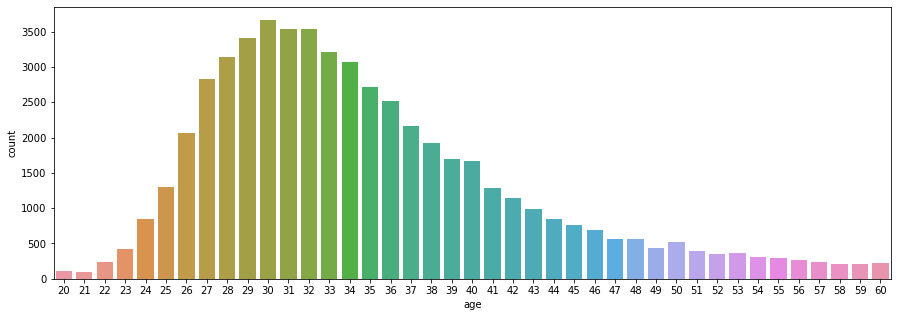

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(data= data, x = "age")
plt.show()

#### Most of the Employees are between the age of 25 and 40

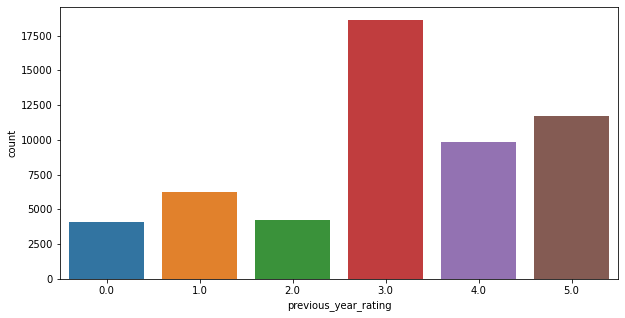

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x = "previous_year_rating")
plt.show()

<AxesSubplot:ylabel='previous_year_rating'>

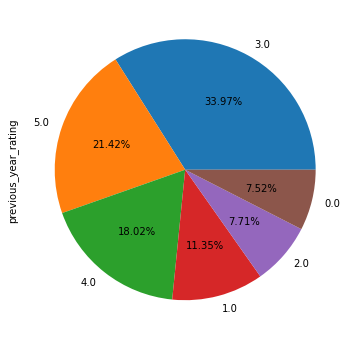

In [35]:
plt.figure(figsize= (6,6))
data['previous_year_rating'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

#### In previous year rating 37% of Employess are rated 3

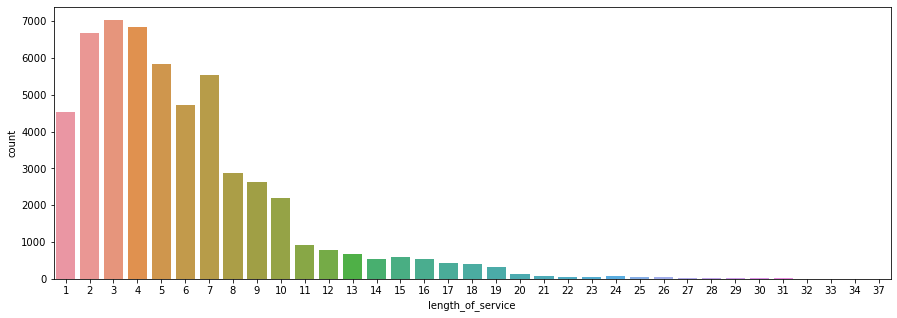

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(data= data, x = "length_of_service")
plt.show()

#### Length of service is mostly between 1 to 10 years

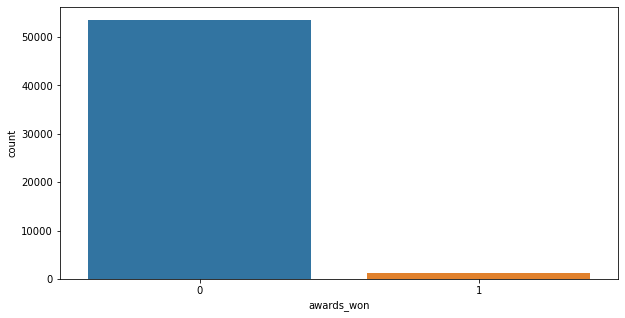

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x = "awards_won")
plt.show()

<AxesSubplot:ylabel='awards_won'>

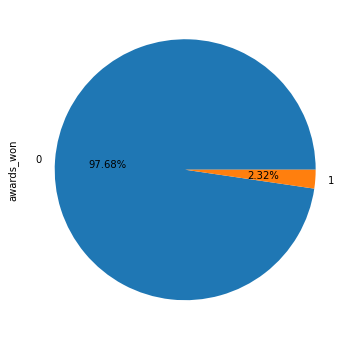

In [38]:
plt.figure(figsize= (6,6))
data['awards_won'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

#### Nearly 2% of the employees have won awards

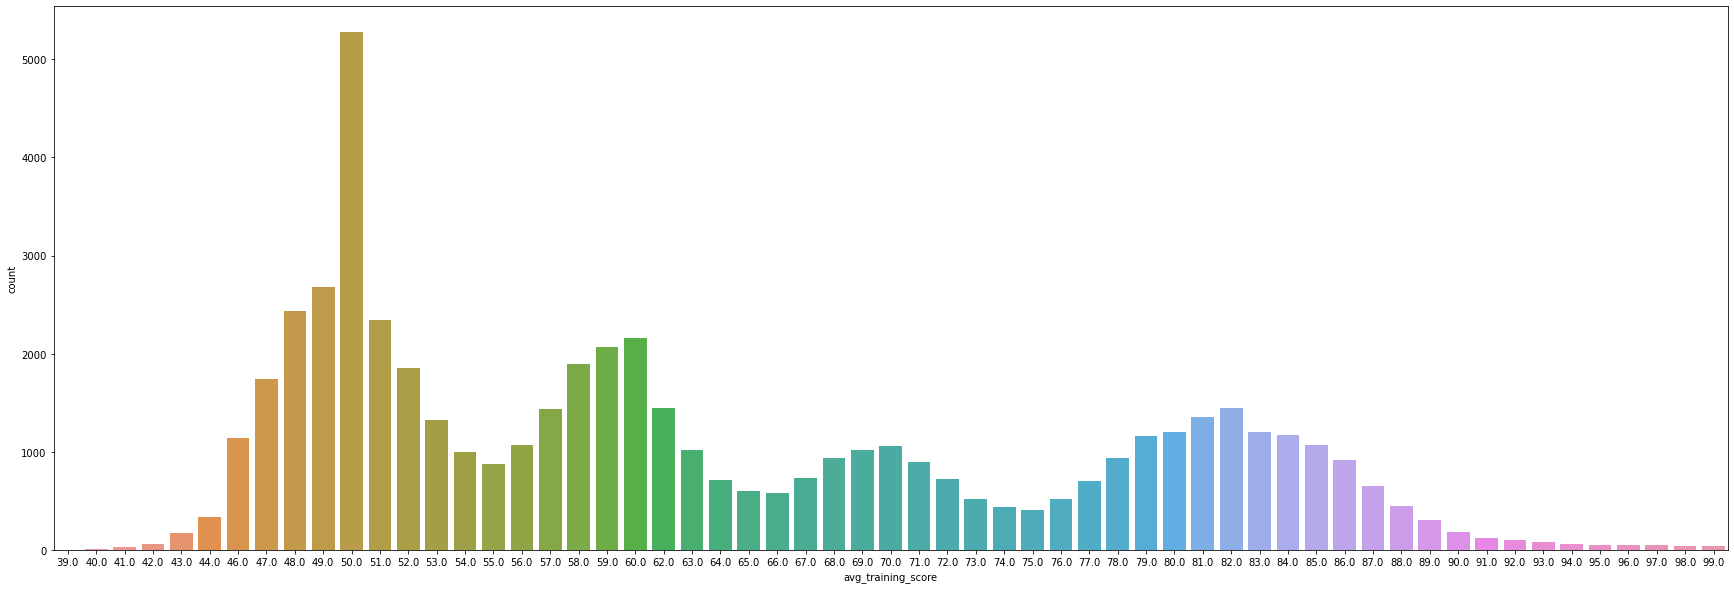

In [39]:
plt.figure(figsize=(30,10))
sns.countplot(data= data, x = "avg_training_score")
plt.show()

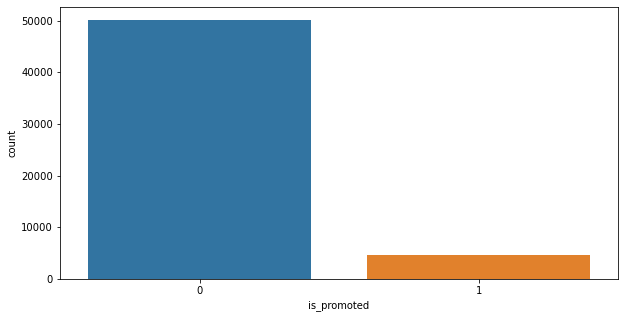

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(data= data, x = "is_promoted")
plt.show()

<AxesSubplot:ylabel='is_promoted'>

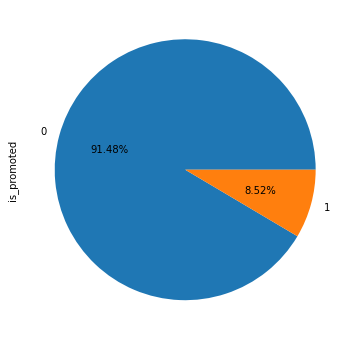

In [41]:
plt.figure(figsize= (6,6))
data['is_promoted'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

#### Data is unbalanced. 91.48% employees are not promoted

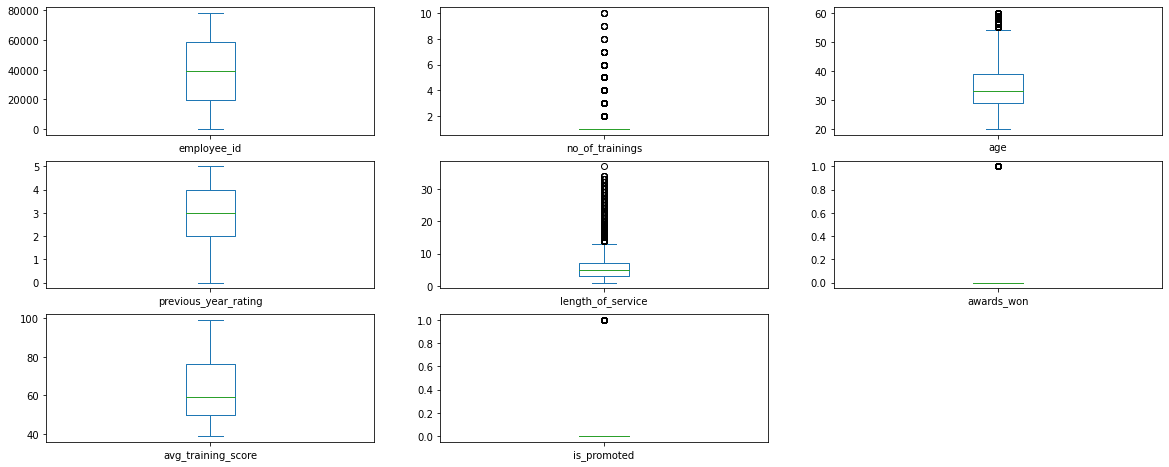

In [42]:
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(20, 8),sharex=False)
plt.show()

array([[<AxesSubplot:title={'center':'employee_id'}>,
        <AxesSubplot:title={'center':'no_of_trainings'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'previous_year_rating'}>,
        <AxesSubplot:title={'center':'length_of_service'}>,
        <AxesSubplot:title={'center':'awards_won'}>],
       [<AxesSubplot:title={'center':'avg_training_score'}>,
        <AxesSubplot:title={'center':'is_promoted'}>, <AxesSubplot:>]],
      dtype=object)

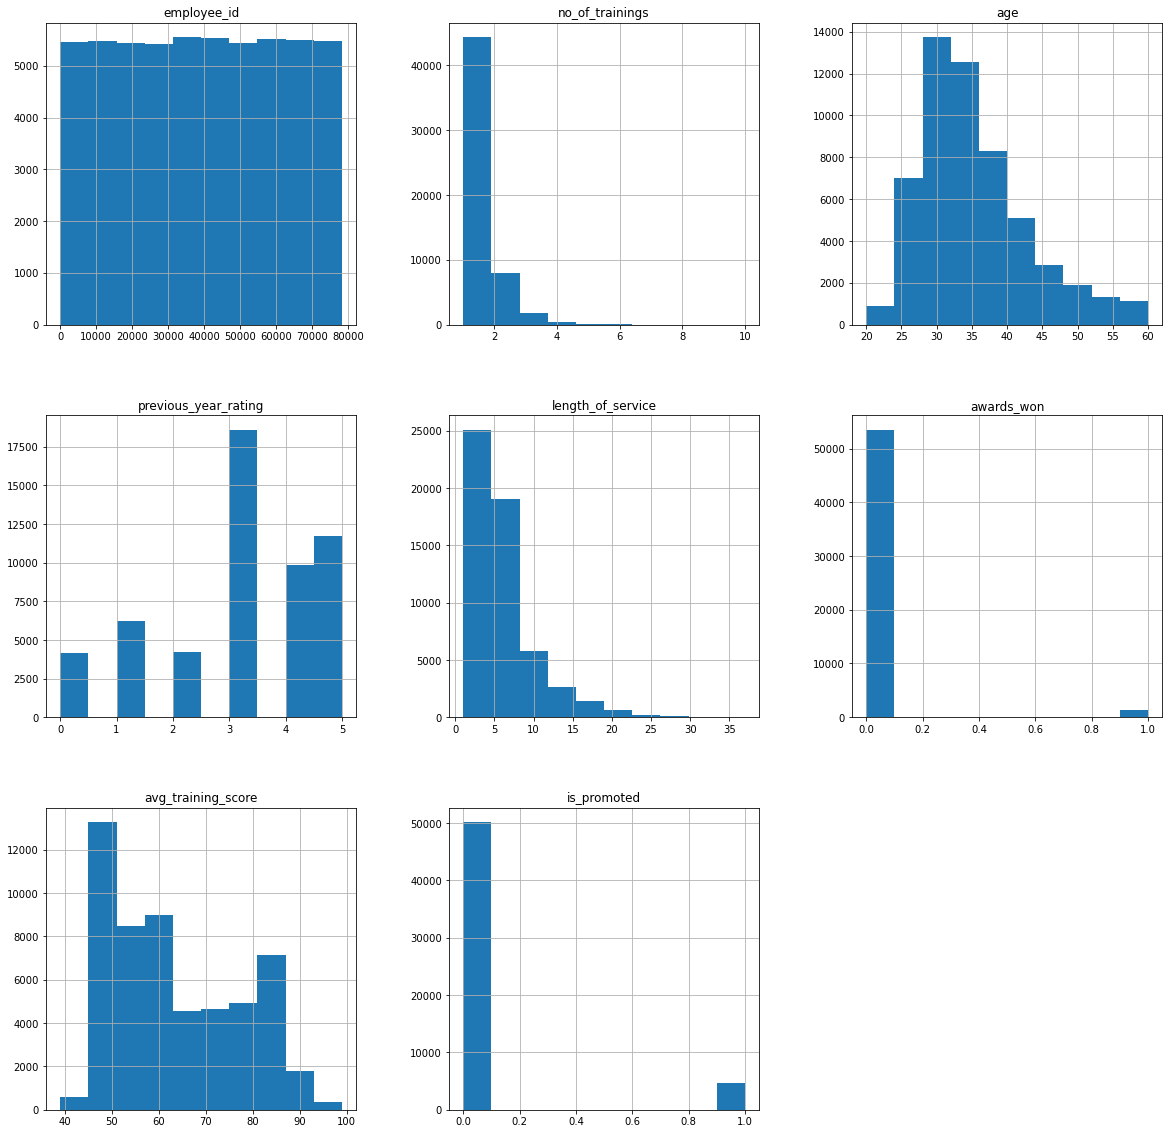

In [43]:
data.hist(figsize=(20,20))

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='department', ylabel='count'>

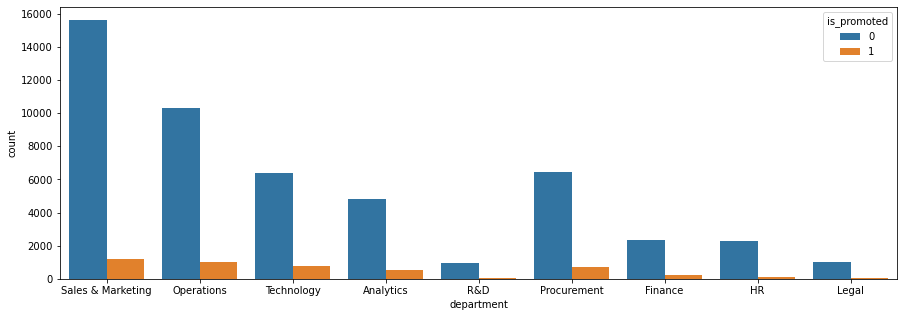

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(data['department'] , hue = data['is_promoted'])

#### Most employees are being promoted from  Sales & Marketing, Operations, Technology, Analytics and procurement. All other department employees have least promotion.

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

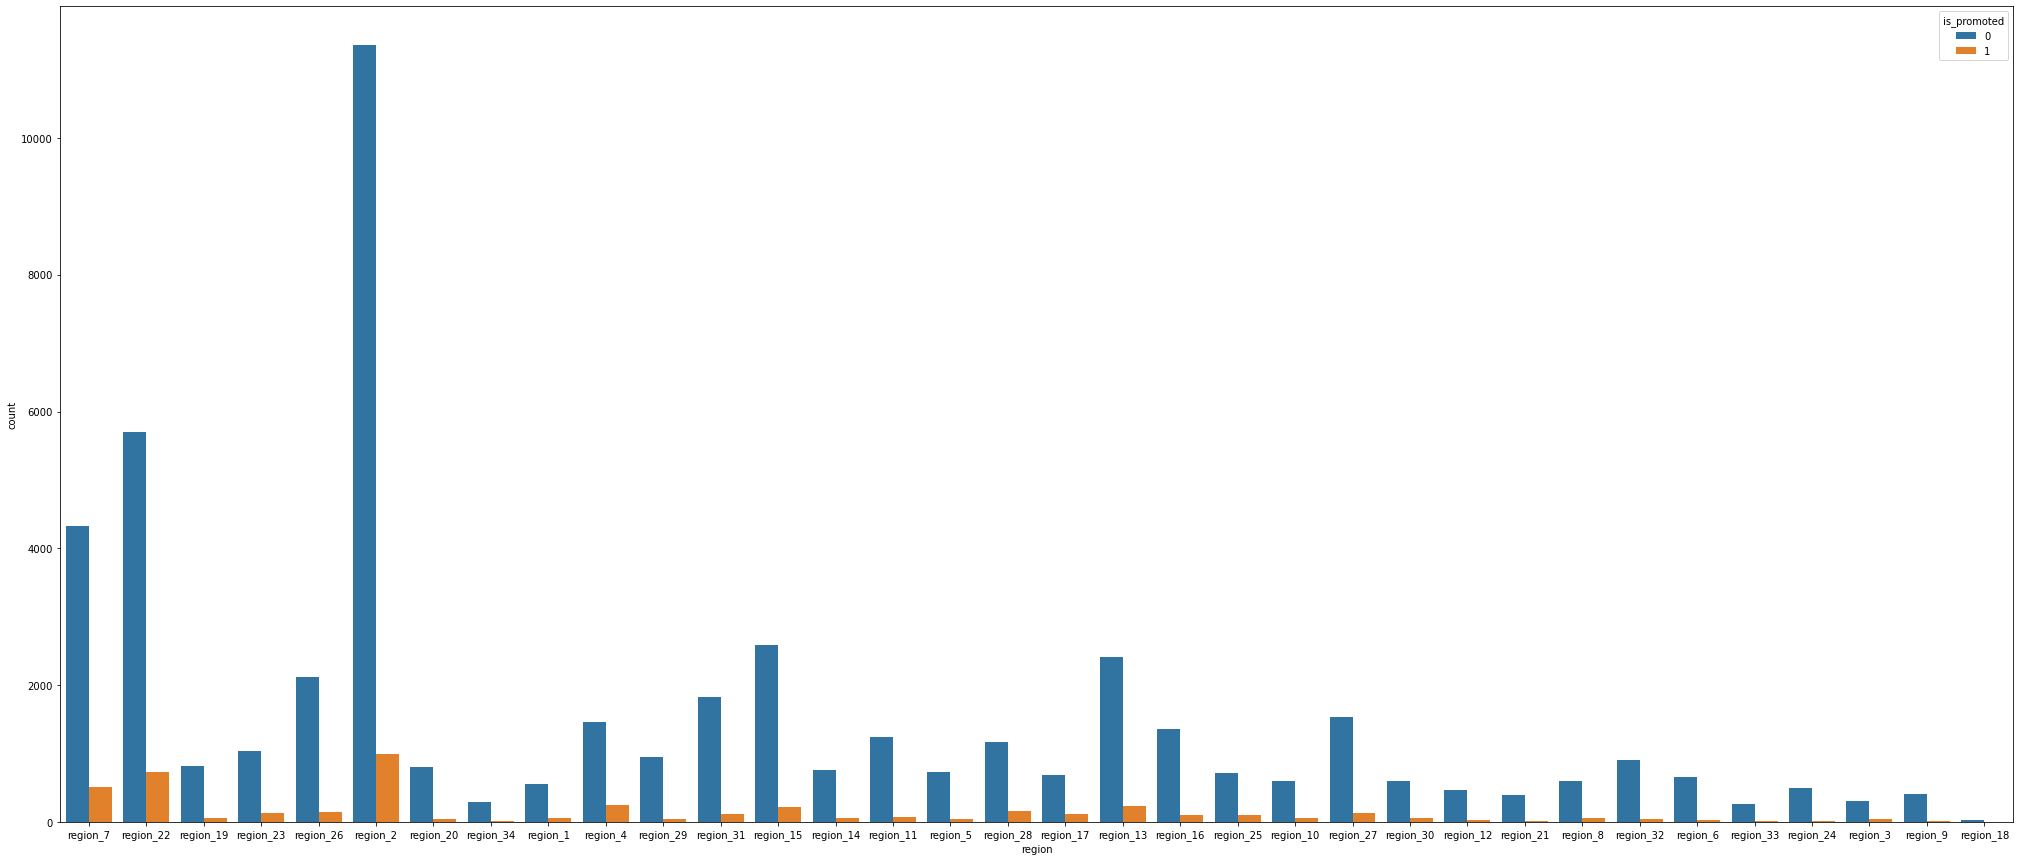

In [45]:
plt.figure(figsize=(35,15))
sns.countplot(data['region'] , hue = data['is_promoted'])

#### Mostly Employees from region 2 are being promoted

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

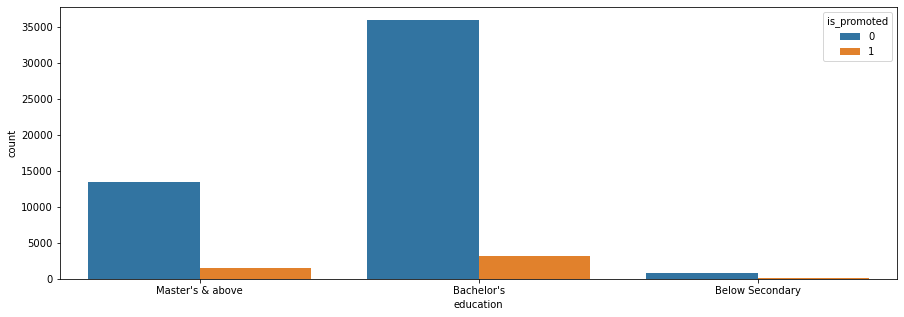

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(data['education'] , hue = data['is_promoted'])

#### Mostly Employees with bachelor's have been promoted

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

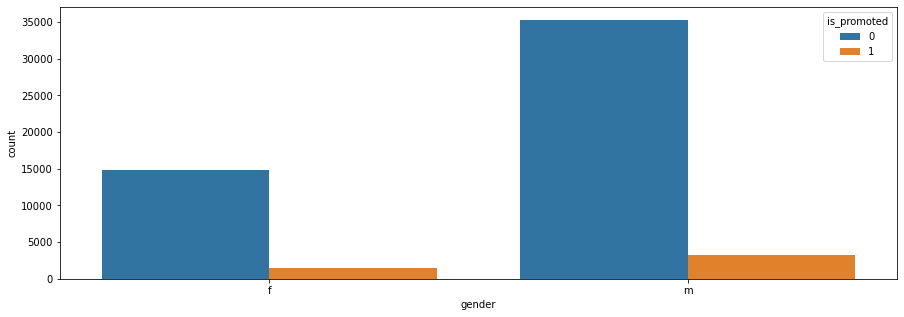

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(data['gender'] , hue = data['is_promoted'])

#### Since the majority of employees are Male, They are the ones with maximum promotion.

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

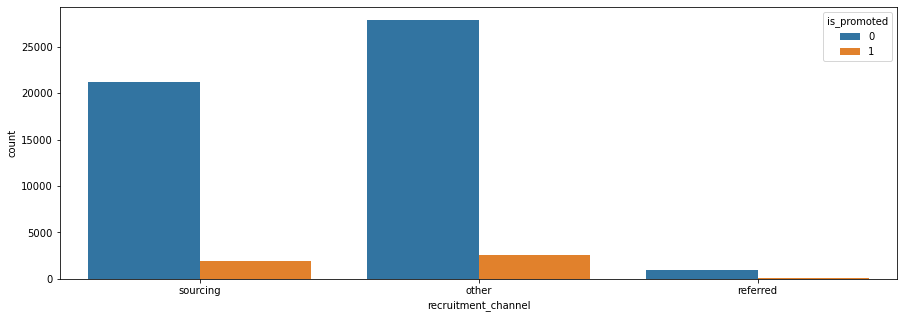

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(data['recruitment_channel'] , hue = data['is_promoted'])

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_trainings', ylabel='count'>

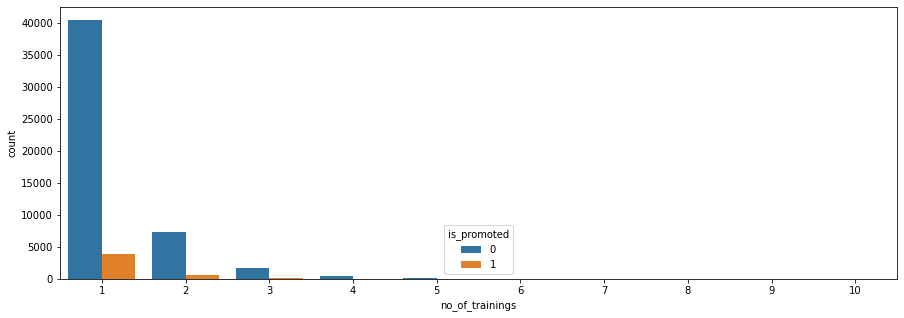

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(data['no_of_trainings'] , hue = data['is_promoted'])

#### Employees who have atleast 1 training Certificate have got promoted

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

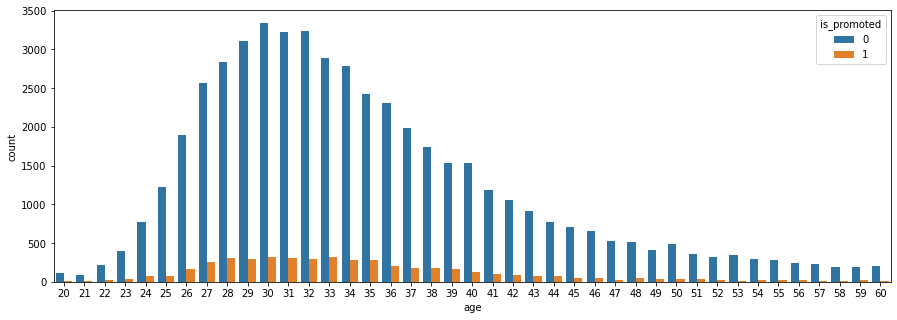

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(data['age'] , hue = data['is_promoted'])

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

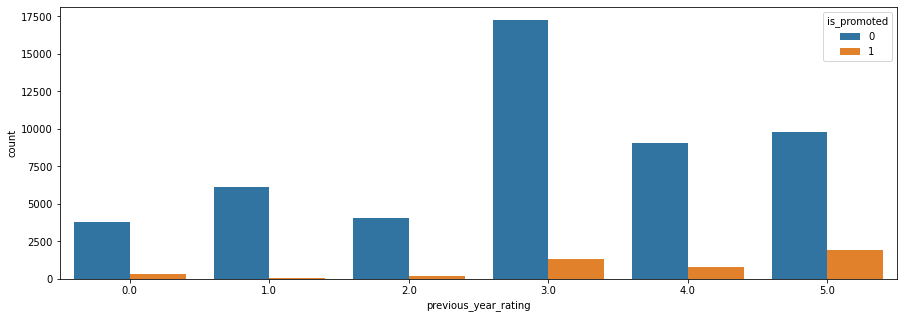

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(data['previous_year_rating'] , hue = data['is_promoted'])

#### Employees whose rating is 5,  have more chances of being promoted.

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length_of_service', ylabel='count'>

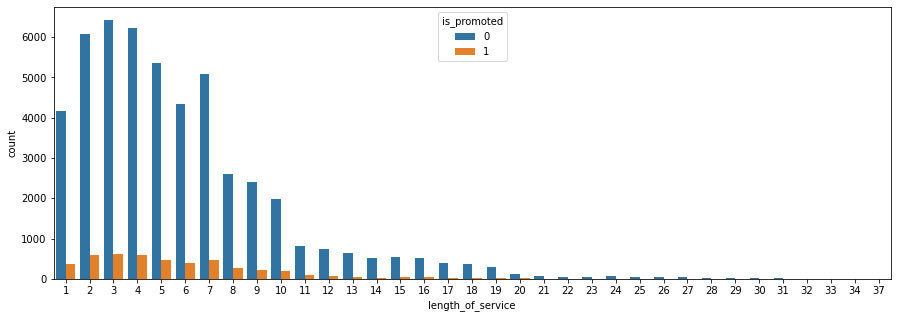

In [53]:
plt.figure(figsize=(15,5))
sns.countplot(data['length_of_service'] , hue = data['is_promoted'])

#### If the Length of service of employees is  1 to 10 year they have high chances of being promoted.

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='awards_won', ylabel='count'>

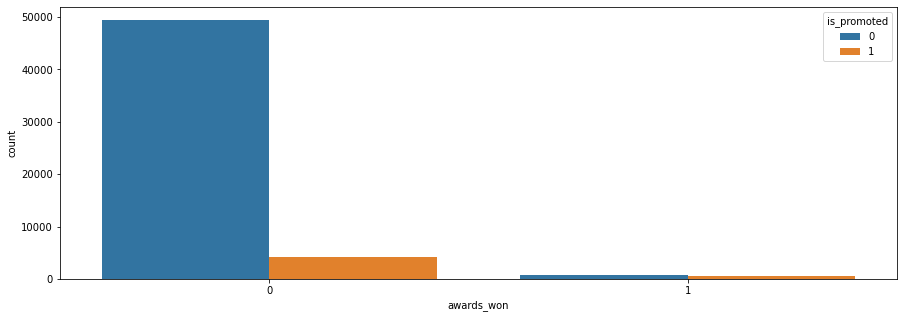

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(data['awards_won'] , hue = data['is_promoted'])

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_training_score', ylabel='count'>

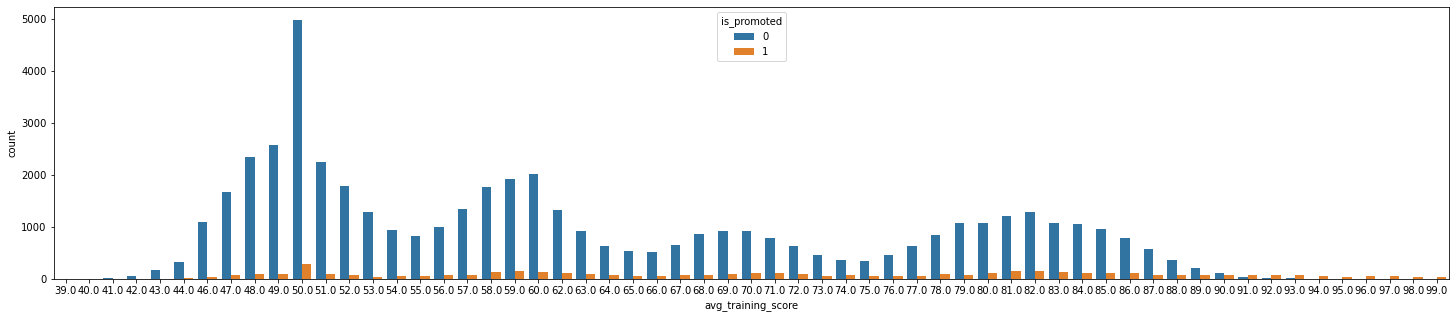

In [55]:
plt.figure(figsize=(25,5))
sns.countplot(data['avg_training_score'] , hue = data['is_promoted'])

In [56]:
col=['department','region','education','gender','recruitment_channel']
le=LabelEncoder()
data[col] = data[col].apply(le.fit_transform)
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,0,49.0,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,60.0,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,50.0,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,50.0,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,73.0,0


In [57]:
data=data.drop('employee_id', axis=1)

In [58]:
data.corr()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
department,1.000000,-0.020592,0.043441,-0.030108,0.004732,0.014152,0.079162,-0.100340,0.059060,-0.002151,-0.229926,0.000130
region,-0.020592,1.000000,-0.003815,0.019730,-0.000920,-0.004590,-0.088918,-0.013465,-0.058939,0.000307,0.023816,0.008841
education,0.043441,-0.003815,1.000000,-0.032368,-0.003564,-0.033469,0.339966,0.092379,0.233666,-0.001409,0.034177,0.029257
gender,-0.030108,0.019730,-0.032368,1.000000,0.006567,0.084501,-0.016293,-0.025053,-0.019675,0.002381,-0.019046,-0.011109
recruitment_channel,0.004732,-0.000920,-0.003564,0.006567,1.000000,-0.010405,-0.011400,0.003506,-0.002887,-0.005510,-0.002759,0.002229
no_of_trainings,0.014152,-0.004590,-0.033469,0.084501,-0.010405,1.000000,-0.081278,-0.064119,-0.057275,-0.007628,0.046176,-0.024896
age,0.079162,-0.088918,0.339966,-0.016293,-0.011400,-0.081278,1.000000,0.177935,0.657111,-0.008169,-0.049374,-0.017166
previous_year_rating,-0.100340,-0.013465,0.092379,-0.025053,0.003506,-0.064119,0.177935,1.000000,0.191163,0.021475,0.053174,0.125991
length_of_service,0.059060,-0.058939,0.233666,-0.019675,-0.002887,-0.057275,0.657111,0.191163,1.000000,-0.039927,-0.038313,-0.010670
awards_won,-0.002151,0.000307,-0.001409,0.002381,-0.005510,-0.007628,-0.008169,0.021475,-0.039927,1.000000,0.073011,0.195871


<AxesSubplot:>

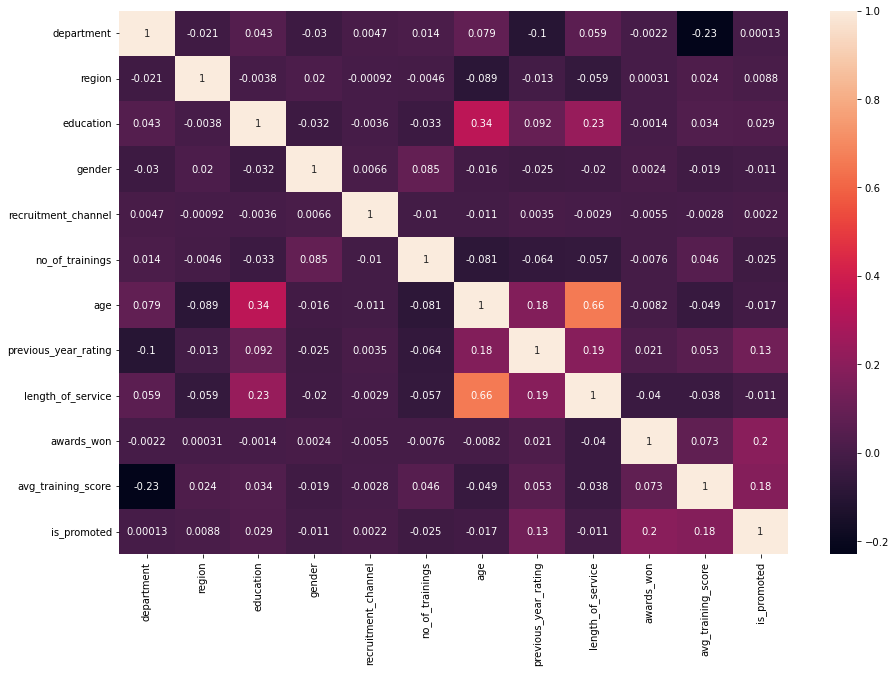

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

#### is_promoted has a good correlation with department, region, education, recruitment channel, previous year rating, award won and avg training score.

### Randomly Resampling 

#### Data is unbalanced, so we need to balance it. oversampling is done for this. Undersampling will cause data loss.

In [60]:
#Dividing dataset 
X = data.drop('is_promoted' ,  axis = 1)
y = data['is_promoted']

In [61]:
ovs = SMOTE()
X_ovs, y_ovs = ovs.fit_resample(X, y)

In [62]:
print(X_ovs.shape)
print(y_ovs.shape)

(100280, 11)
(100280,)


In [63]:
data_new = pd.concat([X_ovs , y_ovs] , axis = 1)

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_promoted', ylabel='count'>

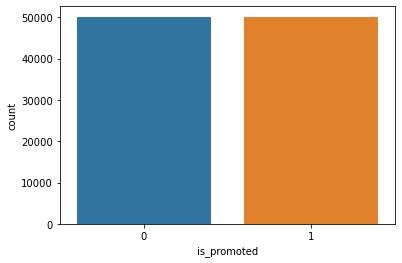

In [64]:
sns.countplot(data_new['is_promoted'])

In [65]:
data_new['is_promoted'].value_counts()

0    50140
1    50140
Name: is_promoted, dtype: int64

## Model Building

In [66]:
#Dividing dataset 
X = data_new.drop('is_promoted' ,  axis = 1)
y = data_new['is_promoted']

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [68]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70196, 11)
(70196,)
(30084, 11)
(30084,)


## Logistic Regression

In [74]:
# Running the model on train data and validating on validation data

model_log = LogisticRegression()
model_log.fit(X_train,y_train)

C:\Users\parth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy score on train data: 67.96683571713487
F1 macro score on train data: 0.6795862049903529
classification_report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.67     35088
           1       0.67      0.70      0.68     35108

    accuracy                           0.68     70196
   macro avg       0.68      0.68      0.68     70196
weighted avg       0.68      0.68      0.68     70196

confusion_matrix: 
 [[23293 11795]
 [10691 24417]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


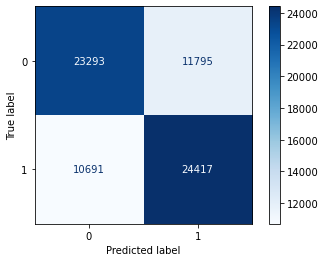

In [75]:
# for training data
y_pred_train = model_log.predict(X_train)
accuracy_logtrain=accuracy_score(y_train,y_pred_train)*100

print("Accuracy score on train data:" ,accuracy_logtrain)
print("F1 macro score on train data:",f1_score(y_train,y_pred_train, average='macro'))
print("classification_report:\n",classification_report(y_train,y_pred_train))
print("confusion_matrix: \n",confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model_log, X_train,y_train,cmap=plt.cm.Blues); plt.show();

In [81]:
# for test data 
y_pred_test = model_log.predict(X_test)
accuracy_logtest=accuracy_score(y_test,y_pred_test)*100

print("Accuracy score on test data:" ,accuracy_logtest)
print("F1 macro score on test data:",f1_score(y_test,y_pred_test, average='macro'))
print("classification_report:\n",classification_report(y_test,y_pred_test))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred_test))


Accuracy score on test data: 68.00624916899348
F1 macro score on test data: 0.6800357557364703
classification_report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.68     15052
           1       0.68      0.69      0.68     15032

    accuracy                           0.68     30084
   macro avg       0.68      0.68      0.68     30084
weighted avg       0.68      0.68      0.68     30084

confusion_matrix: 
 [[10092  4960]
 [ 4665 10367]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


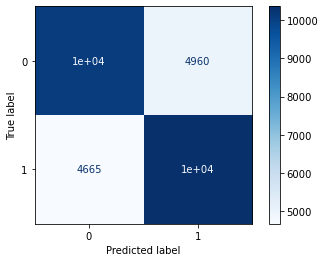

In [80]:
# plotting confusion matrix
plot_confusion_matrix(model_log, X_test,y_test,cmap=plt.cm.Blues)
plt.show()

## Support Vector Machines

In [82]:
# Running the model on train data and validating on validation data
model_svm = LinearSVC()
model_svm.fit(X_train,y_train)

C:\Users\parth\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

Accuracy score on train data: 50.497179326457356
F1 macro score on train data: 0.3448746147796847
classification_report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     35088
           1       0.96      0.01      0.02     35108

    accuracy                           0.50     70196
   macro avg       0.73      0.51      0.34     70196
weighted avg       0.73      0.50      0.34     70196

confusion_matrix: 
 [[35074    14]
 [34735   373]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


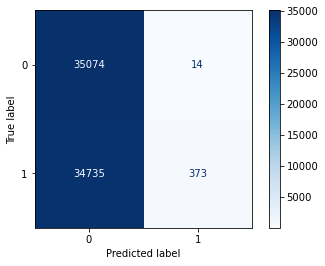

In [83]:
# for training data
y_pred_train = model_svm.predict(X_train)
accuracy_svmtrain=accuracy_score(y_train,y_pred_train)*100

print("Accuracy score on train data:" ,accuracy_svmtrain)
print("F1 macro score on train data:",f1_score(y_train,y_pred_train, average='macro'))
print("classification_report:\n",classification_report(y_train,y_pred_train))
print("confusion_matrix: \n",confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model_svm, X_train,y_train,cmap=plt.cm.Blues); plt.show();

In [84]:
# for test data 
y_pred_test = model_svm.predict(X_test)
accuracy_svmtest=accuracy_score(y_test,y_pred_test)*100

print("Accuracy score on test data:" ,accuracy_svmtest)
print("F1 macro score on test data:",f1_score(y_test,y_pred_test, average='macro'))
print("classification_report:\n",classification_report(y_test,y_pred_test))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred_test))

Accuracy score on test data: 50.49195585693392
F1 macro score on test data: 0.3438872588245755
classification_report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     15052
           1       0.97      0.01      0.02     15032

    accuracy                           0.50     30084
   macro avg       0.73      0.50      0.34     30084
weighted avg       0.73      0.50      0.34     30084

confusion_matrix: 
 [[15047     5]
 [14889   143]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


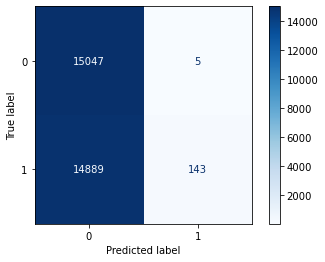

In [85]:
# plotting confusion matrix
plot_confusion_matrix(model_svm, X_test,y_test,cmap=plt.cm.Blues); plt.show();

## Naive Bayes

In [86]:
# Running the model on train data and validating on validation data

model_nb = GaussianNB()
model_nb.fit(X_train,y_train)

GaussianNB()

Accuracy score on train data: 66.76448800501453
F1 macro score on train data: 0.6661584329692845
classification_report:
               precision    recall  f1-score   support

           0       0.69      0.60      0.64     35088
           1       0.65      0.73      0.69     35108

    accuracy                           0.67     70196
   macro avg       0.67      0.67      0.67     70196
weighted avg       0.67      0.67      0.67     70196

confusion_matrix: 
 [[21091 13997]
 [ 9333 25775]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


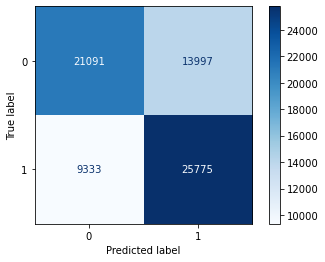

In [87]:
# for training data
y_pred_train = model_nb.predict(X_train)
accuracy_nbtrain=accuracy_score(y_train,y_pred_train)*100

print("Accuracy score on train data:" ,accuracy_nbtrain)
print("F1 macro score on train data:",f1_score(y_train,y_pred_train, average='macro'))
print("classification_report:\n",classification_report(y_train,y_pred_train))
print("confusion_matrix: \n",confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model_nb, X_train,y_train,cmap=plt.cm.Blues); plt.show();

In [88]:
# for test data 
y_pred_test = model_nb.predict(X_test)
accuracy_nbtest=accuracy_score(y_test,y_pred_test)*100

print("Accuracy score on test data:" ,accuracy_nbtest)
print("F1 macro score on test data:",f1_score(y_test,y_pred_test, average='macro'))
print("classification_report:\n",classification_report(y_test,y_pred_test))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred_test))

Accuracy score on test data: 66.75309134423614
F1 macro score on test data: 0.6662579051080072
classification_report:
               precision    recall  f1-score   support

           0       0.69      0.61      0.65     15052
           1       0.65      0.73      0.69     15032

    accuracy                           0.67     30084
   macro avg       0.67      0.67      0.67     30084
weighted avg       0.67      0.67      0.67     30084

confusion_matrix: 
 [[ 9112  5940]
 [ 4062 10970]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


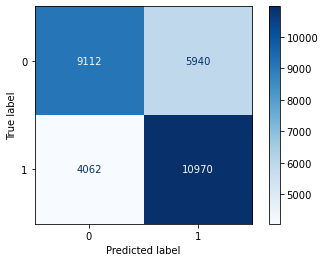

In [89]:
# plotting confusion matrix
plot_confusion_matrix(model_nb, X_test,y_test,cmap=plt.cm.Blues); plt.show();

## K- Nearest Neighbors Classifier

In [90]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy score on train data: 93.64208786825459
F1 macro score on train data: 0.9361951733801361
classification_report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93     35088
           1       0.89      1.00      0.94     35108

    accuracy                           0.94     70196
   macro avg       0.94      0.94      0.94     70196
weighted avg       0.94      0.94      0.94     70196

confusion_matrix: 
 [[30779  4309]
 [  154 34954]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


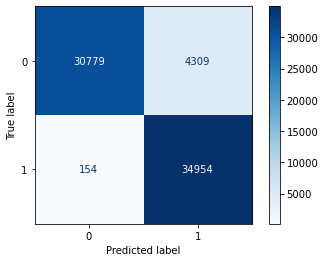

In [91]:
# for training data
y_pred_train = model_knn.predict(X_train)
accuracy_knntrain=accuracy_score(y_train,y_pred_train)*100

print("Accuracy score on train data:" ,accuracy_knntrain)
print("F1 macro score on train data:",f1_score(y_train,y_pred_train, average='macro'))
print("classification_report:\n",classification_report(y_train,y_pred_train))
print("confusion_matrix: \n",confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model_knn, X_train,y_train,cmap=plt.cm.Blues); plt.show();

Accuracy score on test data: 88.12657891237868
F1 macro score on test data: 0.8799664571072132
classification_report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87     15052
           1       0.82      0.99      0.89     15032

    accuracy                           0.88     30084
   macro avg       0.90      0.88      0.88     30084
weighted avg       0.90      0.88      0.88     30084

confusion_matrix: 
 [[11691  3361]
 [  211 14821]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


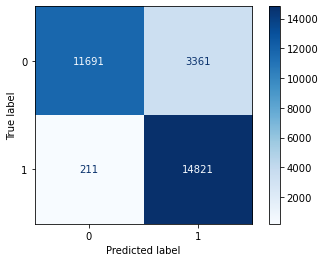

In [92]:
# for test data 
y_pred_test = model_knn.predict(X_test)
accuracy_knntest=accuracy_score(y_test,y_pred_test)*100
print("Accuracy score on test data:" ,accuracy_knntest)
print("F1 macro score on test data:",f1_score(y_test,y_pred_test, average='macro'))
print("classification_report:\n",classification_report(y_test,y_pred_test))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred_test))

# plotting confusion matrix
plot_confusion_matrix(model_knn, X_test,y_test,cmap=plt.cm.Blues); plt.show();

## Decision Tree

In [93]:
model_dt = DecisionTreeClassifier(criterion='gini',random_state=7)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

Accuracy score on train data: 99.94301669610805
F1 macro score on train data: 0.9994301669606178
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     35088
           1       1.00      1.00      1.00     35108

    accuracy                           1.00     70196
   macro avg       1.00      1.00      1.00     70196
weighted avg       1.00      1.00      1.00     70196

confusion_matrix: 
 [[35079     9]
 [   31 35077]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


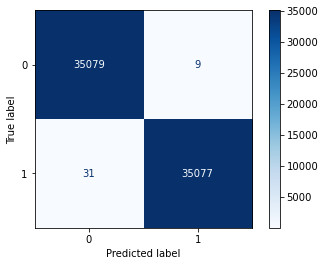

In [94]:
# for training data
y_pred_train = model_dt.predict(X_train)
accuracy_dttrain=accuracy_score(y_train,y_pred_train)*100

print("Accuracy score on train data:" ,accuracy_dttrain)
print("F1 macro score on train data:",f1_score(y_train,y_pred_train, average='macro'))
print("classification_report:\n",classification_report(y_train,y_pred_train))
print("confusion_matrix: \n",confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model_dt, X_train,y_train,cmap=plt.cm.Blues); plt.show();

Accuracy score on test data: 91.7098790054514
F1 macro score on test data: 0.9170844234102912
classification_report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92     15052
           1       0.91      0.93      0.92     15032

    accuracy                           0.92     30084
   macro avg       0.92      0.92      0.92     30084
weighted avg       0.92      0.92      0.92     30084

confusion_matrix: 
 [[13597  1455]
 [ 1039 13993]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


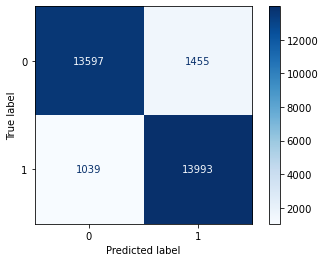

In [95]:
# for test data 
y_pred_test = model_dt.predict(X_test)
accuracy_dttest=accuracy_score(y_test,y_pred_test)*100

print("Accuracy score on test data:" ,accuracy_dttest)
print("F1 macro score on test data:",f1_score(y_test,y_pred_test, average='macro'))
print("classification_report:\n",classification_report(y_test,y_pred_test))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred_test))

# plotting confusion matrix
plot_confusion_matrix(model_dt, X_test,y_test,cmap=plt.cm.Blues); plt.show()

## Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier( n_estimators=10, max_features=1, random_state=7)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=1, n_estimators=10, random_state=7)

Accuracy score on train data: 99.61821186392386
F1 macro score on train data: 0.9961821007378423
classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     35088
           1       1.00      0.99      1.00     35108

    accuracy                           1.00     70196
   macro avg       1.00      1.00      1.00     70196
weighted avg       1.00      1.00      1.00     70196

confusion_matrix: 
 [[35040    48]
 [  220 34888]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


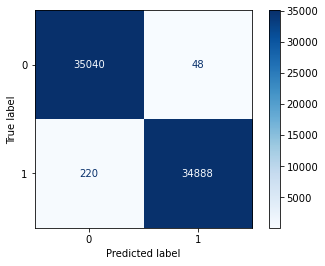

In [97]:
# for training data
y_pred_train = model_rf.predict(X_train)
accuracy_rftrain=accuracy_score(y_train,y_pred_train)*100

print("Accuracy score on train data:" ,accuracy_rftrain)
print("F1 macro score on train data:",f1_score(y_train,y_pred_train, average='macro'))
print("classification_report:\n",classification_report(y_train,y_pred_train))
print("confusion_matrix: \n",confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model_rf, X_train,y_train,cmap=plt.cm.Blues); plt.show();

Accuracy score on test data: 93.77077516287727
F1 macro score on test data: 0.9376839457927082
classification_report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     15052
           1       0.95      0.92      0.94     15032

    accuracy                           0.94     30084
   macro avg       0.94      0.94      0.94     30084
weighted avg       0.94      0.94      0.94     30084

confusion_matrix: 
 [[14399   653]
 [ 1221 13811]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


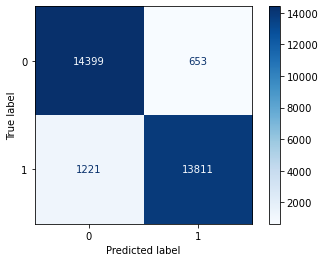

In [98]:
# for test data 
y_pred_test = model_rf.predict(X_test)
accuracy_rftest=accuracy_score(y_test,y_pred_test)*100

print("Accuracy score on test data:" ,accuracy_rftest)
print("F1 macro score on test data:",f1_score(y_test,y_pred_test, average='macro'))
print("classification_report:\n",classification_report(y_test,y_pred_test))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred_test))

# plotting confusion matrix
plot_confusion_matrix(model_rf, X_test,y_test,cmap=plt.cm.Blues); plt.show();

## AdaBoost classifier

In [99]:
model_ab = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 10, random_state=7)
model_ab.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10,
                   random_state=7)

Accuracy score on train data: 99.94301669610805
F1 macro score on train data: 0.9994301668112058
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     35088
           1       1.00      1.00      1.00     35108

    accuracy                           1.00     70196
   macro avg       1.00      1.00      1.00     70196
weighted avg       1.00      1.00      1.00     70196

confusion_matrix: 
 [[35060    28]
 [   12 35096]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


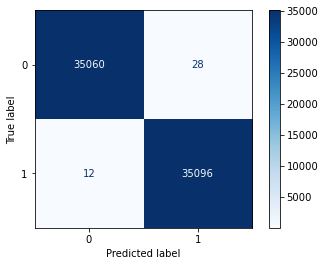

In [100]:
# for training data
y_pred_train = model_ab.predict(X_train)
accuracy_abtrain=accuracy_score(y_train,y_pred_train)*100

print("Accuracy score on train data:" ,accuracy_abtrain)
print("F1 macro score on train data:",f1_score(y_train,y_pred_train, average='macro'))
print("classification_report:\n",classification_report(y_train,y_pred_train))
print("confusion_matrix: \n",confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model_ab, X_train,y_train,cmap=plt.cm.Blues); plt.show();

Accuracy score on test data: 92.7802153968887
F1 macro score on test data: 0.9277890021974351
classification_report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93     15052
           1       0.92      0.94      0.93     15032

    accuracy                           0.93     30084
   macro avg       0.93      0.93      0.93     30084
weighted avg       0.93      0.93      0.93     30084

confusion_matrix: 
 [[13753  1299]
 [  873 14159]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


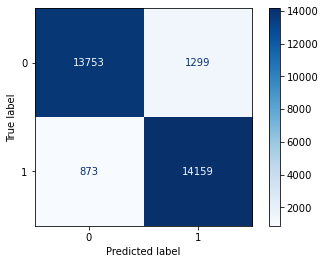

In [101]:
# for test data 
y_pred_test = model_ab.predict(X_test)
accuracy_abtest=accuracy_score(y_test,y_pred_test)*100

print("Accuracy score on test data:" ,accuracy_abtest)
print("F1 macro score on test data:",f1_score(y_test,y_pred_test, average='macro'))
print("classification_report:\n",classification_report(y_test,y_pred_test))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred_test))

# plotting confusion matrix
plot_confusion_matrix(model_ab, X_test,y_test,cmap=plt.cm.Blues); plt.show();

## Bagging

In [102]:
cart = DecisionTreeClassifier()
model_bag = BaggingClassifier(base_estimator=cart, n_estimators=10,random_state = 7)
model_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=7)

Accuracy score on train data: 99.50424525613995
F1 macro score on train data: 0.995042400259625
classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     35088
           1       1.00      0.99      1.00     35108

    accuracy                           1.00     70196
   macro avg       1.00      1.00      1.00     70196
weighted avg       1.00      1.00      1.00     70196

confusion_matrix: 
 [[35038    50]
 [  298 34810]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


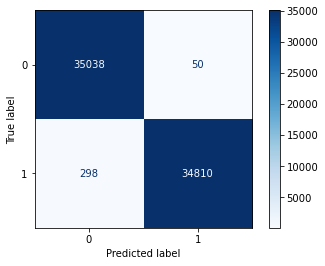

In [103]:
# for training data
y_pred_train = model_bag.predict(X_train)
accuracy_bagtrain=accuracy_score(y_train,y_pred_train)*100

print("Accuracy score on train data:" ,accuracy_bagtrain)
print("F1 macro score on train data:",f1_score(y_train,y_pred_train, average='macro'))
print("classification_report:\n",classification_report(y_train,y_pred_train))
print("confusion_matrix: \n",confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model_bag, X_train,y_train,cmap=plt.cm.Blues); plt.show();

Accuracy score on test data: 94.48876479191597
F1 macro score on test data: 0.9448725417099575
classification_report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     15052
           1       0.96      0.93      0.94     15032

    accuracy                           0.94     30084
   macro avg       0.95      0.94      0.94     30084
weighted avg       0.95      0.94      0.94     30084

confusion_matrix: 
 [[14462   590]
 [ 1068 13964]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


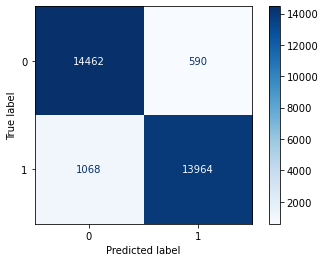

In [104]:
# for test data 
y_pred_test = model_bag.predict(X_test)
accuracy_bagtest=accuracy_score(y_test,y_pred_test)*100

print("Accuracy score on test data:" ,accuracy_bagtest)
print("F1 macro score on test data:",f1_score(y_test,y_pred_test, average='macro'))
print("classification_report:\n",classification_report(y_test,y_pred_test))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred_test))

# plotting confusion matrix
plot_confusion_matrix(model_bag, X_test,y_test,cmap=plt.cm.Blues); plt.show();

## Xgboost

In [105]:
model_xg = XGBClassifier()
model_xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Accuracy score on train data: 94.9313351188102
F1 macro score on train data: 0.9492414476728077
classification_report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     35088
           1       0.99      0.91      0.95     35108

    accuracy                           0.95     70196
   macro avg       0.95      0.95      0.95     70196
weighted avg       0.95      0.95      0.95     70196

confusion_matrix: 
 [[34640   448]
 [ 3110 31998]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


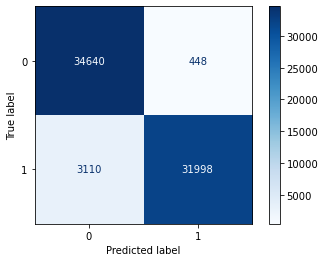

In [106]:
# for training data
y_pred_train = model_xg.predict(X_train)
accuracy_xgtrain=accuracy_score(y_train,y_pred_train)*100

print("Accuracy score on train data:" ,accuracy_xgtrain)
print("F1 macro score on train data:",f1_score(y_train,y_pred_train, average='macro'))
print("classification_report:\n",classification_report(y_train,y_pred_train))
print("confusion_matrix: \n",confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model_xg, X_train,y_train,cmap=plt.cm.Blues); plt.show();

Accuracy score on test data: 94.3558037495014
F1 macro score on test data: 0.9434692880172734
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     15052
           1       0.98      0.90      0.94     15032

    accuracy                           0.94     30084
   macro avg       0.95      0.94      0.94     30084
weighted avg       0.95      0.94      0.94     30084

confusion_matrix: 
 [[14789   263]
 [ 1435 13597]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


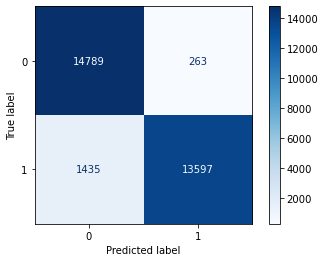

In [107]:
# for test data 
y_pred_test = model_xg.predict(X_test)
accuracy_xgtest=accuracy_score(y_test,y_pred_test)*100

print("Accuracy score on test data:" ,accuracy_xgtest)
print("F1 macro score on test data:",f1_score(y_test,y_pred_test, average='macro'))
print("classification_report:\n",classification_report(y_test,y_pred_test))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred_test))

# plotting confusion matrix
plot_confusion_matrix(model_xg, X_test,y_test,cmap=plt.cm.Blues); plt.show();

## Gradient Boosting Classifier

In [108]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train,y_train)

GradientBoostingClassifier()

Accuracy score on train data: 86.0120234771212
F1 macro score on train data: 0.8596038925523778
classification_report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87     35088
           1       0.91      0.80      0.85     35108

    accuracy                           0.86     70196
   macro avg       0.87      0.86      0.86     70196
weighted avg       0.87      0.86      0.86     70196

confusion_matrix: 
 [[32317  2771]
 [ 7048 28060]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


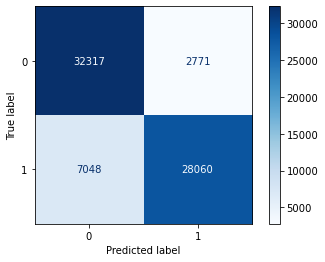

In [109]:
# for training data
y_pred_train = model_gb.predict(X_train)
accuracy_gbtrain=accuracy_score(y_train,y_pred_train)*100

print("Accuracy score on train data:" ,accuracy_gbtrain)
print("F1 macro score on train data:",f1_score(y_train,y_pred_train, average='macro'))
print("classification_report:\n",classification_report(y_train,y_pred_train))
print("confusion_matrix: \n",confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model_gb, X_train,y_train,cmap=plt.cm.Blues); plt.show();

Accuracy score on test data: 86.04906262465097
F1 macro score on test data: 0.8599277898064028
classification_report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87     15052
           1       0.91      0.80      0.85     15032

    accuracy                           0.86     30084
   macro avg       0.87      0.86      0.86     30084
weighted avg       0.87      0.86      0.86     30084

confusion_matrix: 
 [[13897  1155]
 [ 3042 11990]]


C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


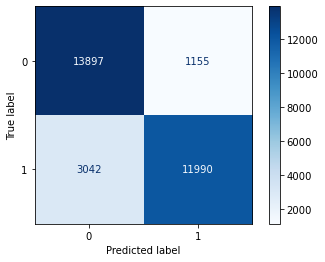

In [110]:
# for test data 
y_pred_test = model_gb.predict(X_test)
accuracy_gbtest=accuracy_score(y_test,y_pred_test)*100

print("Accuracy score on test data:" ,accuracy_gbtest)
print("F1 macro score on test data:",f1_score(y_test,y_pred_test, average='macro'))
print("classification_report:\n",classification_report(y_test,y_pred_test))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred_test))

# plotting confusion matrix
plot_confusion_matrix(model_gb, X_test,y_test,cmap=plt.cm.Blues); plt.show();

## MODEL COMPARISION

In [111]:
scores_dict = {"Model":['Logistic Regression','Support Vector Machines','Naive Bayes','K-Nearest Neighbour','Decision Tree','Random Forest','AdaBoost','Bagged Decision Tree','Xgboosting','Gradient Boosting'],"Training accuracy": [accuracy_logtrain, accuracy_svmtrain, accuracy_nbtrain, accuracy_knntrain,accuracy_dttrain, accuracy_rftrain, accuracy_abtrain,accuracy_bagtrain,accuracy_xgtrain,accuracy_gbtrain],  "Testing accuracy" : [accuracy_logtest, accuracy_svmtest, accuracy_nbtest, accuracy_knntest,accuracy_dttest, accuracy_rftest, accuracy_abtest,accuracy_bagtest, accuracy_xgtest,accuracy_gbtest] }
scores_df = pd.DataFrame(scores_dict)
scores_df

,Model,Training accuracy,Testing accuracy
0,Logistic Regression,67.966836,68.006249
1,Support Vector Machines,50.497179,50.491956
2,Naive Bayes,66.764488,66.753091
3,K-Nearest Neighbour,93.642088,88.126579
4,Decision Tree,99.943017,91.709879
5,Random Forest,99.618212,93.770775
6,AdaBoost,99.943017,92.780215
7,Bagged Decision Tree,99.504245,94.488765
8,Xgboosting,94.931335,94.355804
9,Gradient Boosting,86.012023,86.049063


In [112]:
import pickle
filename='modelxg.sav'  
pickle.dump(model_xg, open(filename, 'wb'))

In [113]:
loaded_model=pickle.load(open('modelxg.sav','rb'))